# Data Visualizations

1. Import Libraries and combined data
2. Bar Chart: orders day of week
3. Histograms and Scatterplots: Prices
4. LIne Charts: order day of the week and time of day

# 01. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\lizan\Desktop\Data Analytics\4.0\31-05-2022 Instacart Basket Analysis'

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_spend_freq2.pkl'))

# 02. Creating Bar Charts

<AxesSubplot:>

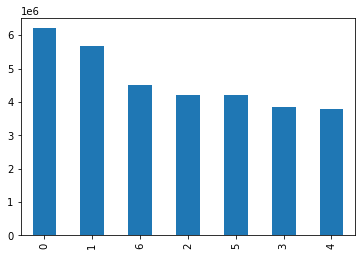

In [4]:
# Creating bar chart for Orders by day of the week

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

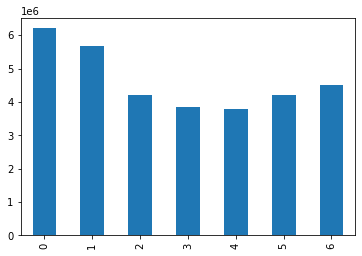

In [5]:
# Reorder to follow the week chronologically

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

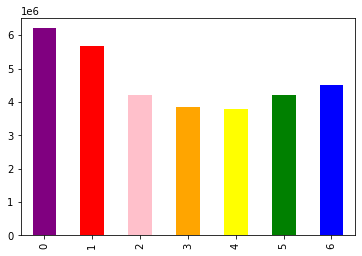

In [9]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

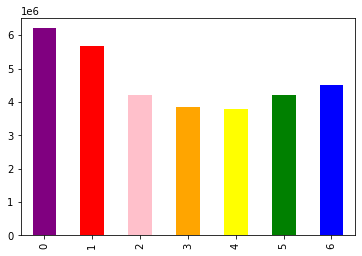

In [10]:
bar.figure

In [11]:
bar.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'bar_orders_dow.png'))

# 03. Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

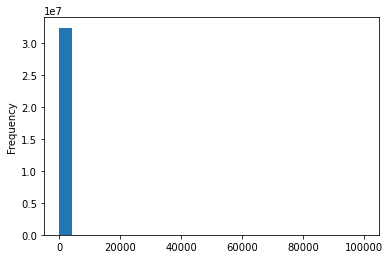

In [12]:
# Histogram of Prices

ords_prods_merge['prices'].plot.hist(bins = 25)

In [13]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [14]:
ords_prods_merge['prices'].mean()

11.980225638467232

In [15]:
ords_prods_merge['prices'].median()

7.4

In [16]:
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

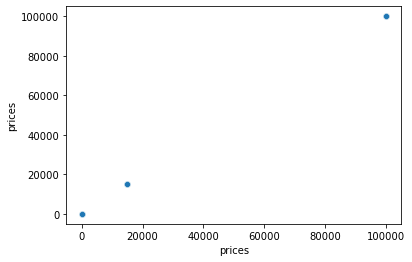

In [18]:
# scatterplot to identify the outlier

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [20]:
# Check for products above $100

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,price_range_loc,Busiest_Day,Busiest_Days,Busiest_Hours,max_order,loyalty_flag,avg_spend,spend_type,median_order_frequency,frequency_flag
10030345,912404,17,12,2,14,5.0,False,21553,5,0,...,High Range Product,Regularly Busy Day,Regular Days,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent Customer
10030346,603376,17,22,6,16,4.0,False,21553,3,1,...,High Range Product,Regularly Busy Day,Regular Days,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent Customer
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,...,High Range Product,Regularly Busy Day,Regular Days,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
10030348,892534,135,3,0,8,12.0,False,21553,3,1,...,High Range Product,Busiest Day,Busiest Days,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
10030349,229704,342,8,1,19,30.0,False,21553,9,0,...,High Range Product,Regularly Busy Day,Busiest Days,Average Orders,16,Regular Customer,114.426619,High Spender,23.0,Non-Frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,...,High Range Product,Busiest Day,Busiest Days,Average Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent Customer
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,...,High Range Product,Busiest Day,Busiest Days,Most Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent Customer
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,...,High Range Product,Regularly Busy Day,Slowest Days,Most Orders,15,Regular Customer,451.153540,High Spender,5.0,Frequent Customer
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,...,High Range Product,Regularly Busy Day,Slowest Days,Average Orders,12,Regular Customer,1178.381871,High Spender,12.0,Regular Customer


In [22]:
# Mark prices over $100 as NaNs

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [23]:
ords_prods_merge['prices'].max()

25.0

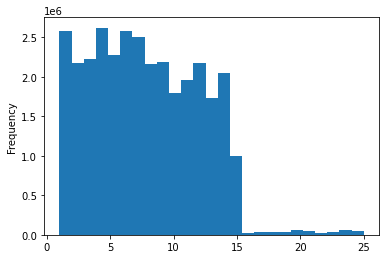

In [24]:
# Re-try histogram

hist = ords_prods_merge['prices'].plot.hist(bins=25)

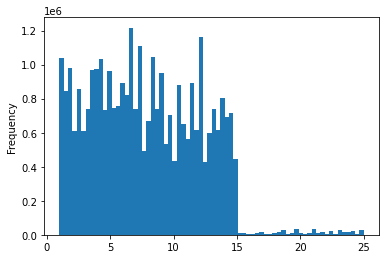

In [25]:
hist = ords_prods_merge['prices'].plot.hist(bins=70)

In [36]:
hist.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'hist_price.png'))

# 04. Line Charts with Sampling

In [5]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [6]:
# Split datafrome into two samples big (70%) and small (30%)

big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [31]:
len(ords_prods_merge)

32404859

In [32]:
len(big) + len(small)

32404859

In [33]:
# Refine the dataframe to be plotted to only the columns needed in the small sample
df_2 = small[['orders_day_of_week', 'prices']]

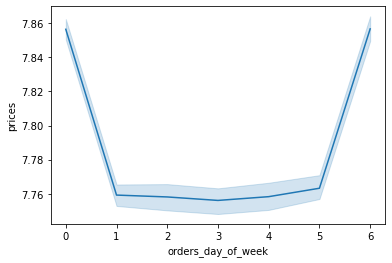

In [35]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [37]:
line.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'line_dow.png'))

In [7]:
df_3 = small[['order_time','prices']]

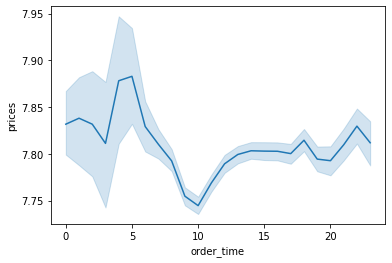

In [8]:
line2 = sns.lineplot(data = df_3, x = 'order_time', y = 'prices')

In [9]:
line2.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'line_price_time.png'))